In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2022-10-15 18:43:57.870953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 18:43:58.059782: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-15 18:43:58.831888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-15 18:43:58.832050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
df = pd.read_csv('../WindFlow/data/data.csv')
df = df[['fecha', 'WDIR', 'WSPD', 'TEMP']]
df.head()

,fecha,WDIR,WSPD,TEMP
0,2022-09-27 22:29:00,304.759,8.79500,11.0417
1,2022-09-27 22:30:00,309.595,9.77750,10.9833
2,2022-09-27 22:31:00,308.165,8.89751,10.9083
3,2022-09-27 22:32:00,310.588,10.06830,10.8250
4,2022-09-27 22:33:00,313.590,9.59000,10.8833


In [3]:
df_5 = df[1::5]
df_5.head()

,fecha,WDIR,WSPD,TEMP
1,2022-09-27 22:30:00,309.595,9.77750,10.9833
6,2022-09-27 22:35:00,308.922,11.21920,10.8000
11,2022-09-27 22:40:00,309.019,8.63251,10.6500
16,2022-09-27 22:45:00,309.009,8.63417,10.4000
21,2022-09-27 22:50:00,311.001,9.28000,10.4000


In [52]:
date_time = pd.to_datetime(df['fecha'])

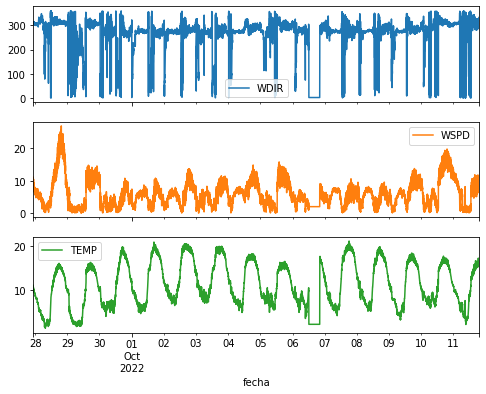

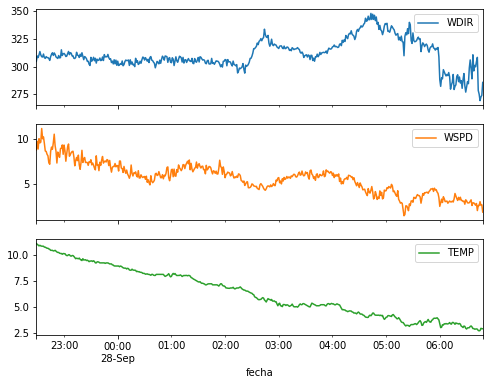

In [5]:
plot_cols = ['WDIR', 'WSPD', 'TEMP']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True)

In [6]:
df = df_5
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WDIR,3996.0,257.304776,76.576597,1.11285,265.302000,277.062500,300.359500,359.2490
WSPD,3996.0,6.035137,3.982572,0.17000,2.849998,5.664165,7.954792,25.1625
TEMP,3996.0,11.094657,5.047999,1.49167,7.062502,10.387500,15.575000,20.6583


In [74]:
date_time = pd.to_datetime(df.pop('fecha'))

Text(0, 0.5, 'Wind Velocity [m/s]')

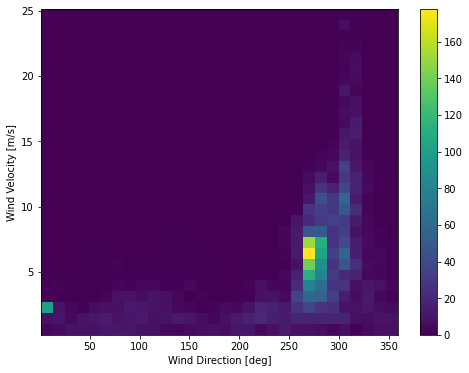

In [7]:
plt.hist2d(df['WDIR'], df['WSPD'], bins=(30, 30))
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [16]:
wv = df['WSPD']

# Convert to radians.
wd_rad = df.pop('WDIR')*np.pi / 180
df['wd_rad'] = wd_rad
# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)
df['wd_cos'] = np.cos(wd_rad)
df['wd_sin'] = np.sin(wd_rad)

In [17]:
df.head()

,fecha,WSPD,TEMP,Wx,Wy,wd_rad,wd_cos,wd_sin
1,2022-09-27 22:30:00,9.77750,10.9833,6.231756,-7.534237,5.403452,0.637357,-0.770569
6,2022-09-27 22:35:00,11.21920,10.8000,7.048595,-8.728560,5.391706,0.628262,-0.778002
11,2022-09-27 22:40:00,8.63251,10.6500,5.434839,-6.706918,5.393399,0.629578,-0.776937
16,2022-09-27 22:45:00,8.63417,10.4000,5.434713,-6.709157,5.393224,0.629442,-0.777047
21,2022-09-27 22:50:00,9.28000,10.4000,6.088350,-7.003599,5.427991,0.656072,-0.754698


(-6.529998987490269,
 16.114959359489017,
 -19.414886150175867,
 5.488399604946537)

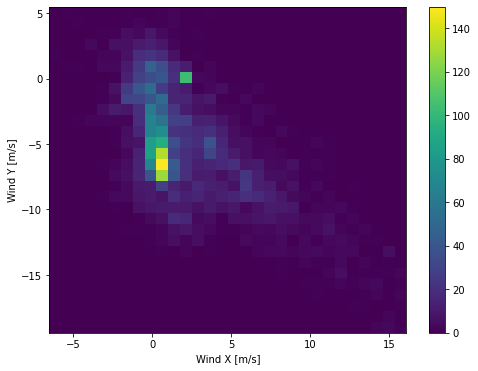

In [10]:
plt.hist2d(df['Wx'], df['Wy'], bins=(30, 30))
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [73]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [69]:
day = 24*60*60/12
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

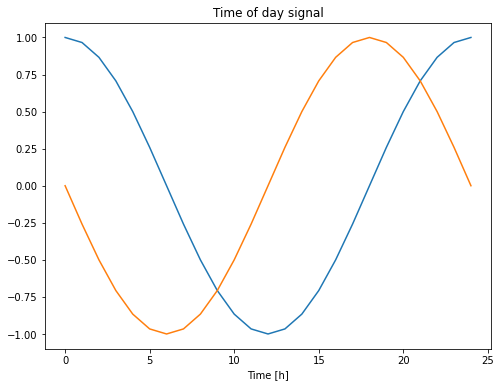

In [67]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [77]:
df.head()

,WSPD,TEMP,Wx,Wy,wd_rad,wd_cos,wd_sin,Day sin,Day cos,Year sin,Year cos
1,9.77750,10.9833,6.231756,-7.534237,5.403452,0.637357,-0.770569,1.000000,-3.591194e-11,-0.998078,-0.061966
6,11.21920,10.8000,7.048595,-8.728560,5.391706,0.628262,-0.778002,0.965926,-2.588190e-01,-0.998082,-0.061906
11,8.63251,10.6500,5.434839,-6.706918,5.393399,0.629578,-0.776937,0.866025,-5.000000e-01,-0.998086,-0.061846
16,8.63417,10.4000,5.434713,-6.709157,5.393224,0.629442,-0.777047,0.707107,-7.071068e-01,-0.998089,-0.061787
21,9.28000,10.4000,6.088350,-7.003599,5.427991,0.656072,-0.754698,0.500000,-8.660254e-01,-0.998093,-0.061727


In [75]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [76]:
num_features

11

In [78]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

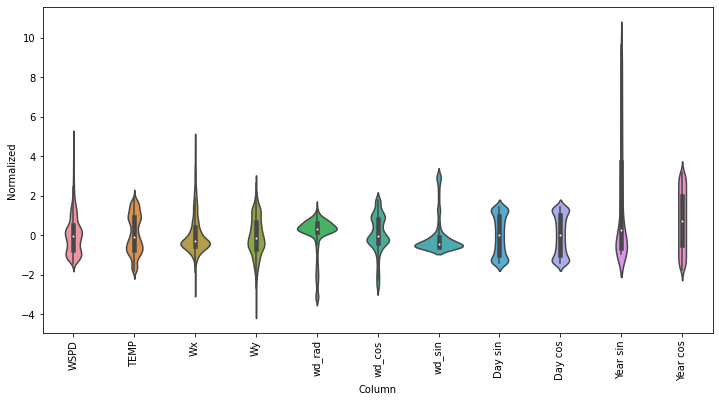

In [79]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [80]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [102]:
w2 = WindowGenerator(input_width=72, label_width=1, shift=1,
                     label_columns=['TEMP'])
w2

Total window size: 73
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Label indices: [72]
Label column name(s): ['TEMP']

In [103]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [105]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 73, 11)
Inputs shape: (3, 72, 11)
Labels shape: (3, 1, 1)


In [106]:
w2.example = example_inputs, example_labels

In [107]:
def plot(self, model=None, plot_col='TEMP', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

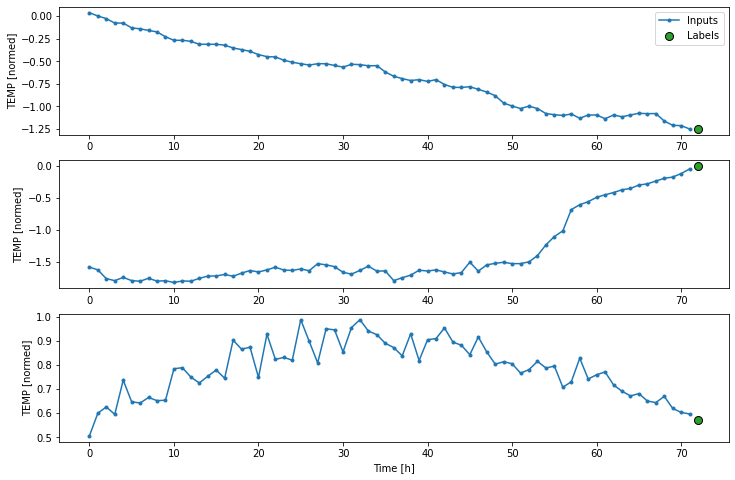

In [108]:
w2.plot()

In [109]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [110]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [111]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 72, 11), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [112]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 72, 11)
Labels shape (batch, time, features): (32, 1, 1)


In [114]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['TEMP'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['TEMP']

In [115]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 11)
Labels shape (batch, time, features): (32, 1, 1)


In [116]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [117]:
baseline = Baseline(label_index=column_indices['TEMP'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

25/25 [==============================] - 0s 3ms/step - loss: 0.0059 - mean_absolute_error: 0.0585


In [119]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['TEMP'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['TEMP']

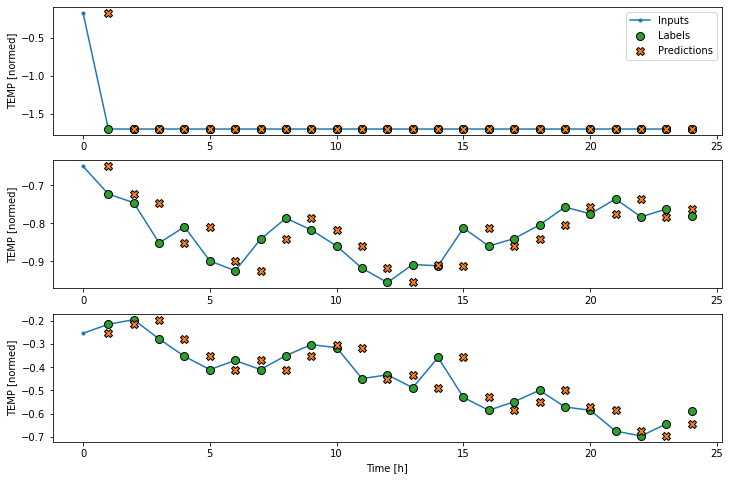

In [121]:
wide_window.plot(baseline)

In [122]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [125]:
MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [130]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/30
88/88 [==============================] - 1s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0646 - val_loss: 0.0060 - val_mean_absolute_error: 0.0593
Epoch 2/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0646 - val_loss: 0.0060 - val_mean_absolute_error: 0.0596
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.0060 - mean_absolute_error: 0.0591


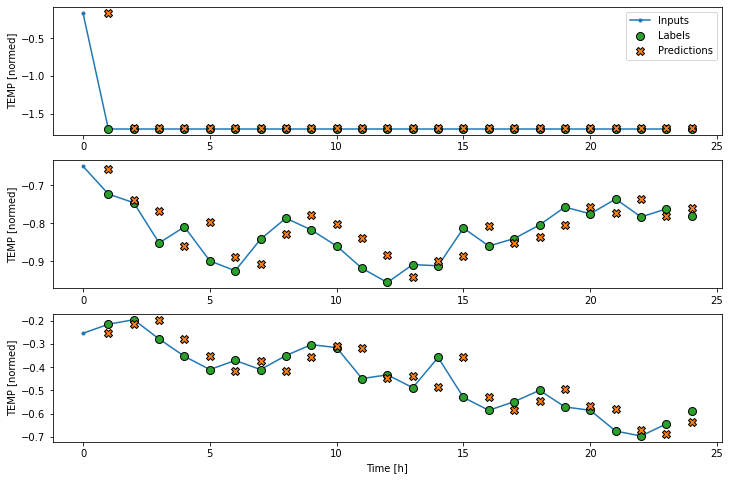

In [131]:
wide_window.plot(linear)

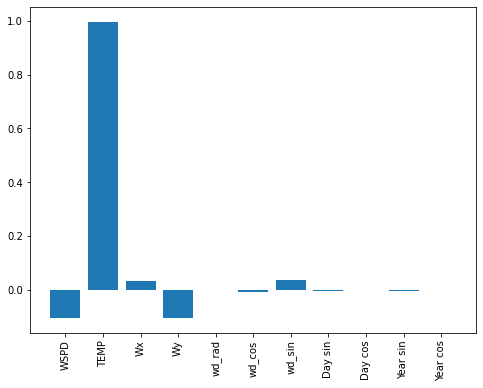

In [128]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [133]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/30
88/88 [==============================] - 1s 6ms/step - loss: 0.3091 - mean_absolute_error: 0.3901 - val_loss: 0.1143 - val_mean_absolute_error: 0.2610
Epoch 2/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0252 - mean_absolute_error: 0.1149 - val_loss: 0.0426 - val_mean_absolute_error: 0.1619
Epoch 3/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0923 - val_loss: 0.0349 - val_mean_absolute_error: 0.1495
Epoch 4/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0843 - val_loss: 0.0264 - val_mean_absolute_error: 0.1323
Epoch 5/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0794 - val_loss: 0.0222 - val_mean_absolute_error: 0.1214
Epoch 6/30
88/88 [==============================] - 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0761 - val_loss: 0.0224 - val_mean_absolute_error: 0.1222
Epoch 7/30
88/88 [==========

In [141]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['TEMP'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['TEMP']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

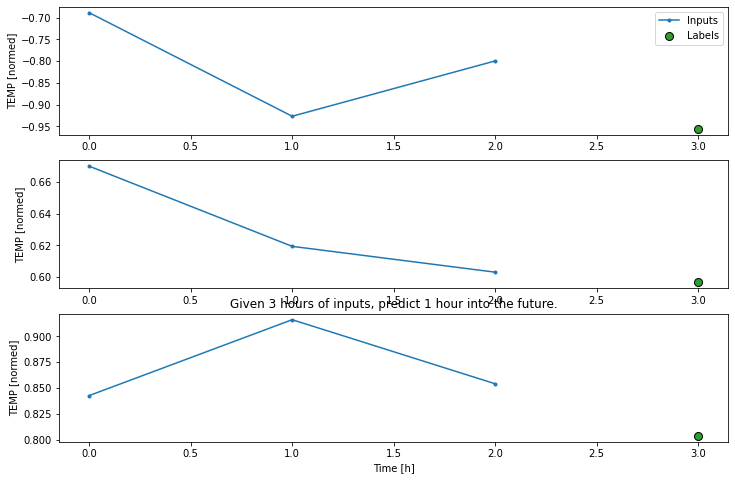

In [142]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [138]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [143]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

25/25 [==============================] - 0s 5ms/step - loss: 0.0322 - mean_absolute_error: 0.1387


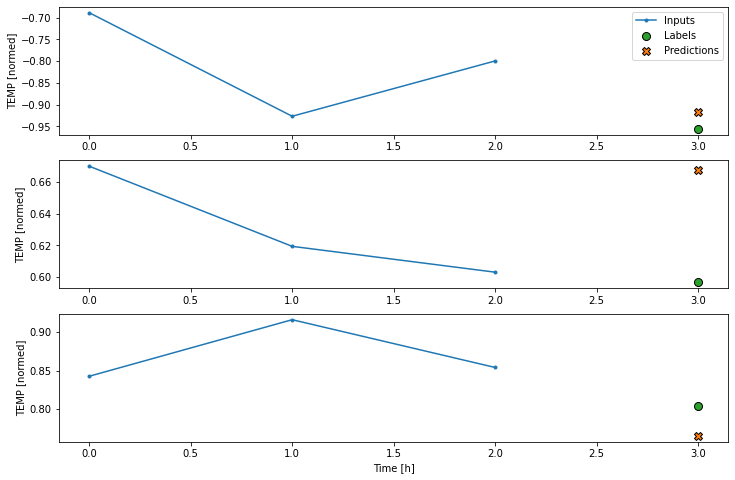

In [144]:
conv_window.plot(multi_step_dense)

In [145]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [146]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 11)
Output shape: (32, 1, 1)


In [147]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

25/25 [==============================] - 0s 5ms/step - loss: 0.0477 - mean_absolute_error: 0.1712


In [148]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['TEMP'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['TEMP']

In [149]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 11)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


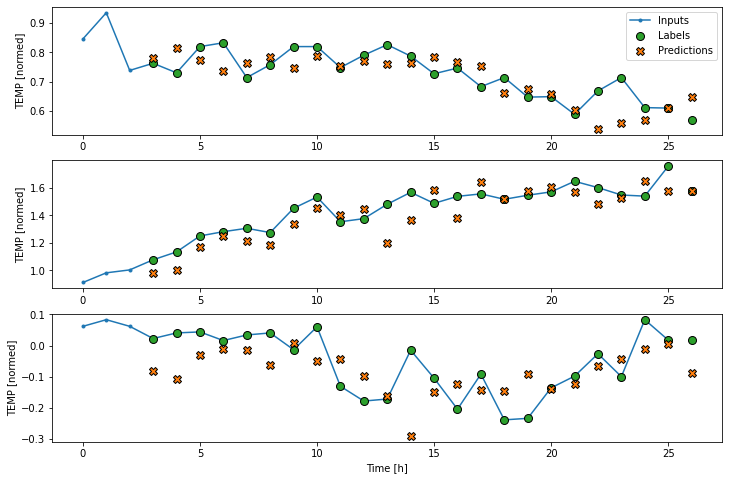

In [151]:
wide_conv_window.plot(conv_model)

In [152]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [153]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

25/25 [==============================] - 0s 10ms/step - loss: 0.0567 - mean_absolute_error: 0.1776


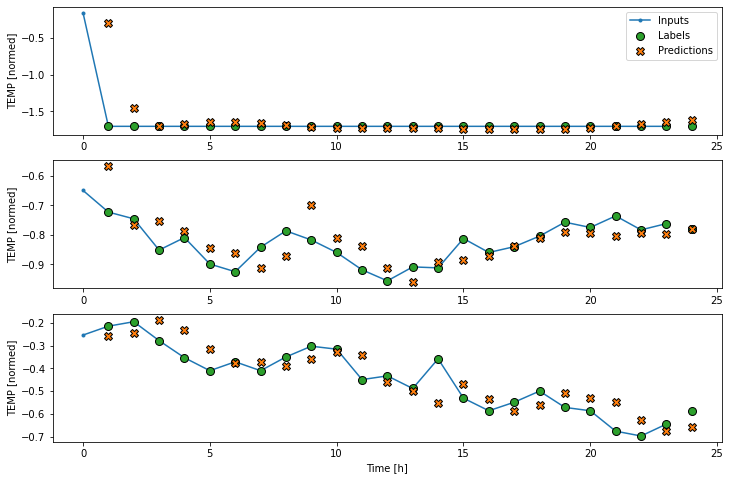

In [154]:
wide_window.plot(lstm_model)

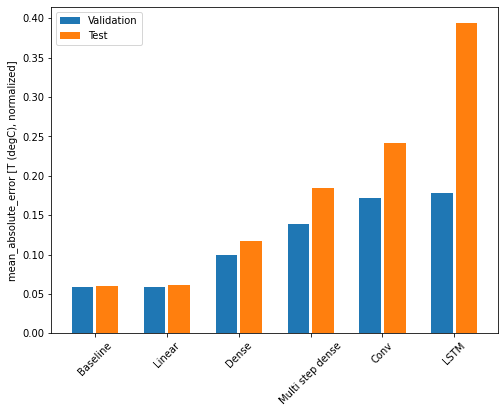

In [155]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [156]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0595
Linear      : 0.0609
Dense       : 0.1169
Multi step dense: 0.1850
Conv        : 0.2415
LSTM        : 0.3945


## multiple outputs

In [159]:
df.head()

,WSPD,TEMP,Wx,Wy,wd_rad,wd_cos,wd_sin,Day sin,Day cos,Year sin,Year cos
1,9.77750,10.9833,6.231756,-7.534237,5.403452,0.637357,-0.770569,1.000000,-3.591194e-11,-0.998078,-0.061966
6,11.21920,10.8000,7.048595,-8.728560,5.391706,0.628262,-0.778002,0.965926,-2.588190e-01,-0.998082,-0.061906
11,8.63251,10.6500,5.434839,-6.706918,5.393399,0.629578,-0.776937,0.866025,-5.000000e-01,-0.998086,-0.061846
16,8.63417,10.4000,5.434713,-6.709157,5.393224,0.629442,-0.777047,0.707107,-7.071068e-01,-0.998089,-0.061787
21,9.28000,10.4000,6.088350,-7.003599,5.427991,0.656072,-0.754698,0.500000,-8.660254e-01,-0.998093,-0.061727


In [180]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=72, label_width=72, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 72, 11)
Labels shape (batch, time, features): (32, 72, 11)


In [181]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [182]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

23/23 [==============================] - 0s 4ms/step - loss: 0.1170 - mean_absolute_error: 0.1744


## multi outputs wd sin cos

In [185]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1, label_columns=['wd_cos', 'wd_sin'])

wide_window = WindowGenerator(
    input_width=72, label_width=72, shift=1, label_columns=['wd_cos', 'wd_sin'])

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 72, 11)
Labels shape (batch, time, features): (32, 72, 2)


In [186]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2)
])

In [189]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

25/25 [==============================] - 0s 4ms/step - loss: 0.3148 - mean_absolute_error: 0.3462


In [193]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1, label_columns=['TEMP'])

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=2)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

25/25 [==============================] - 1s 21ms/step - loss: 0.0569 - mean_absolute_error: 0.1794

CPU times: user 1min 51s, sys: 53.3 s, total: 2min 44s
Wall time: 46.1 s


In [194]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [199]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        1,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

25/25 [==============================] - 0s 11ms/step - loss: 2.7784 - mean_absolute_error: 1.1910

CPU times: user 2min 41s, sys: 1min 20s, total: 4min 1s
Wall time: 1min 6s


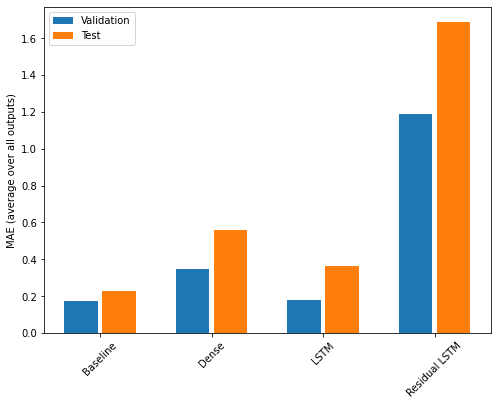

In [200]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

Total window size: 84
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Label indices: [72 73 74 75 76 77 78 79 80 81 82 83]
Label column name(s): None

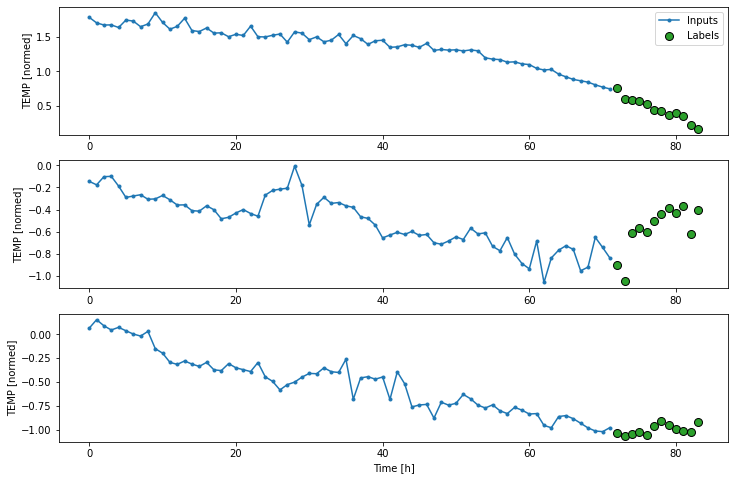

In [205]:
OUT_STEPS = 12
multi_window = WindowGenerator(input_width=72,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

23/23 [==============================] - 0s 4ms/step - loss: 0.6461 - mean_absolute_error: 0.4476


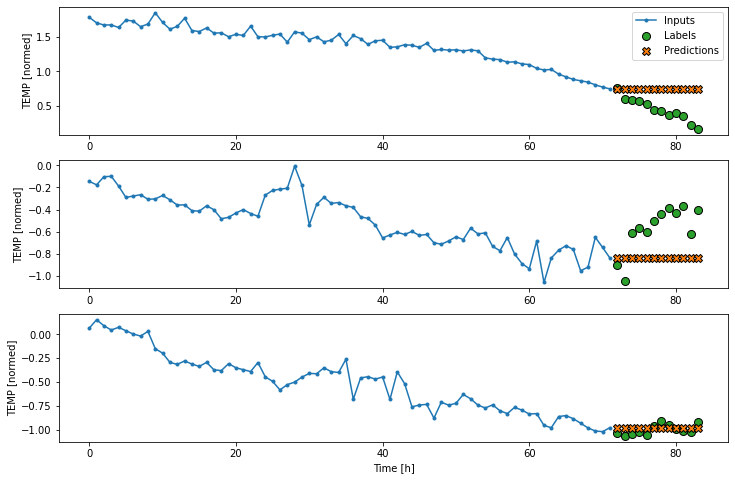

In [209]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

24/24 [==============================] - 0s 4ms/step - loss: 0.3459 - mean_absolute_error: 0.3779


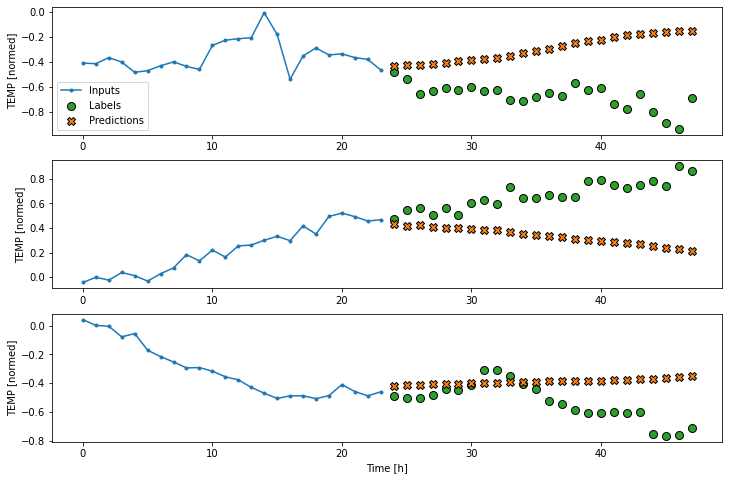

In [227]:
num_features = 11
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

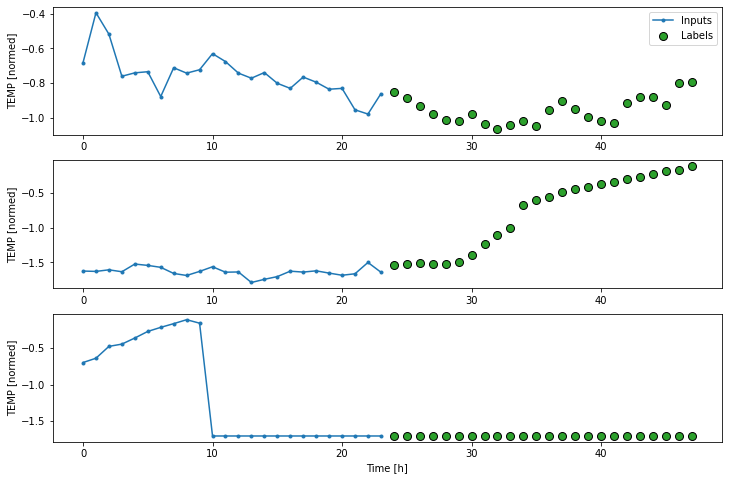

In [228]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [229]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

multi_lstm_model.summary()

24/24 [==============================] - 1s 26ms/step - loss: 0.7016 - mean_absolute_error: 0.5863
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 128)               71680     
                                                                 
 dense_38 (Dense)            (None, 264)               34056     
                                                                 
 reshape_13 (Reshape)        (None, 24, 11)            0         
                                                                 
Total params: 105,736
Trainable params: 105,736
Non-trainable params: 0
_________________________________________________________________


In [232]:
multi_lstm_model.evaluate(multi_window.test, verbose=0)

[3.059380054473877, 1.184676170349121]

In [230]:
multi_lstm_model.evaluate(multi_window.test, verbose=1)

12/12 [==============================] - 0s 17ms/step - loss: 3.0594 - mean_absolute_error: 1.1847


[3.059380054473877, 1.184676170349121]

Total window size: 84
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Label indices: [72 73 74 75 76 77 78 79 80 81 82 83]
Label column name(s): ['wd_cos', 'wd_sin']

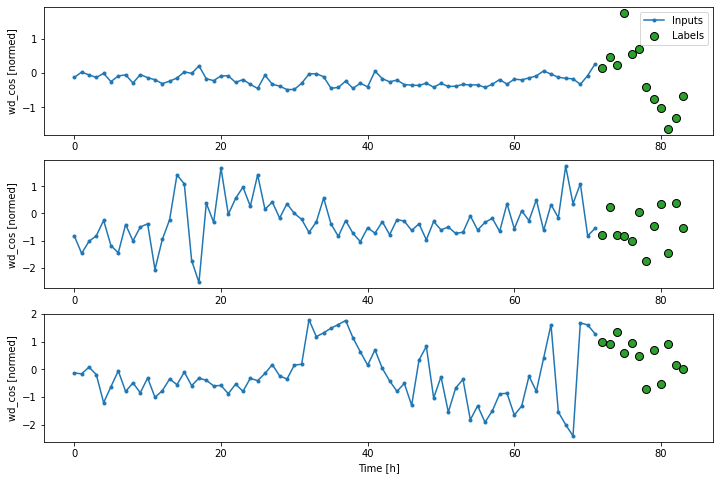

In [238]:
OUT_STEPS = 12
multi_window = WindowGenerator(input_width=72,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns= ['wd_cos', 'wd_sin'])

multi_window.plot(plot_col='wd_cos')
multi_window

In [244]:
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', lstm_model(multi_window.example[0]).shape)

Input shape: (32, 72, 11)
Output shape: (32, 72, 2)


23/23 [==============================] - 3s 113ms/step - loss: 0.5540 - mean_absolute_error: 0.4650


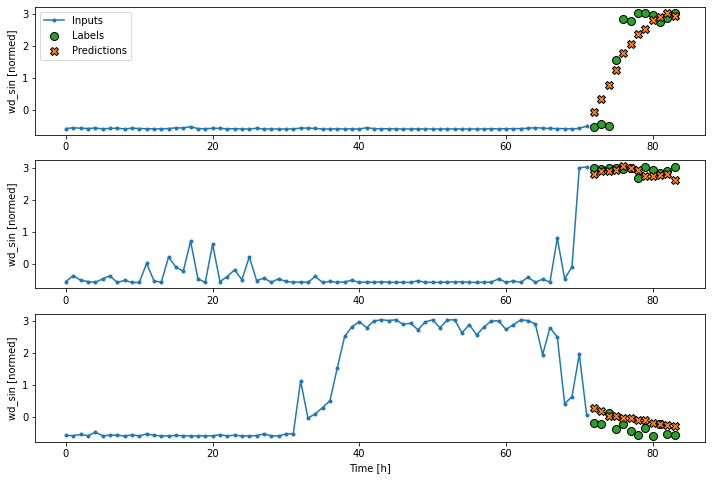

In [272]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    #tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*2,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, 2])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model, plot_col = 'wd_sin')

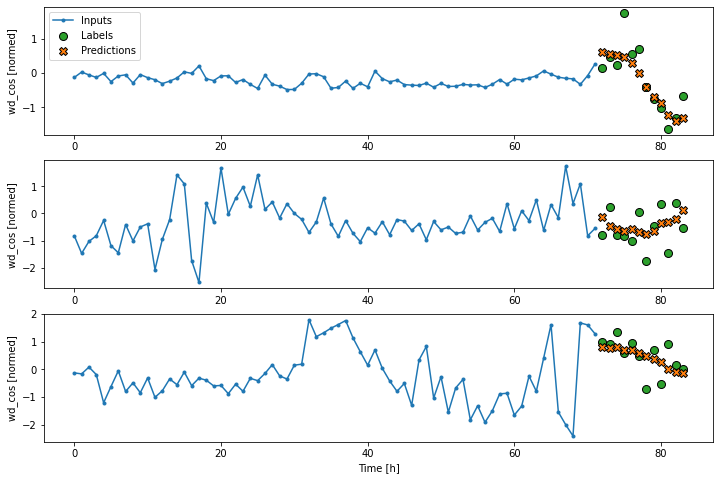

In [273]:
multi_window.plot(multi_lstm_model, plot_col = 'wd_cos')

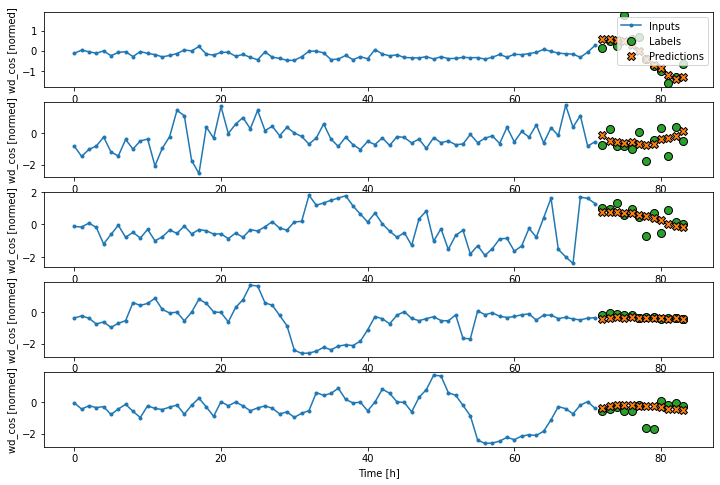

In [275]:
multi_window.plot(multi_lstm_model, plot_col = 'wd_cos', max_subplots = 5)